In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder#, OneHotEncoder

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from helpers import plot_tools as ptools

import os

In [52]:
# Load data
iris_plants_file_path = os.path.join('input', 'Iris.csv')
data = pd.read_csv(iris_plants_file_path)

data = data.drop(['Id'], axis=1) # we have an ID column by default with pandas
display(data.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


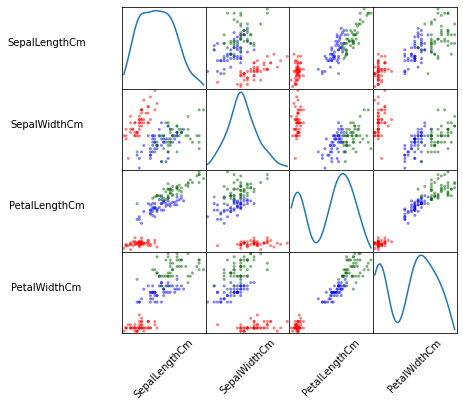

In [53]:
colors = pd.Series(data.Species.map({'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'darkgreen'}))
sm = pd.plotting.scatter_matrix(
    data.loc[:, data.columns != 'Species'],
    # alpha=0.5,
    figsize=(6, 6),
    diagonal='kde',
    color=colors,
)

# better scatter_matrix display from https://stackoverflow.com/a/32568134/12182226
# #Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# #May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.9,0.5) for s in sm.reshape(-1)]

# #Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

It does not seem that there is any missing value in the dataset.  
One of the best feature couple seems to be PetalWidthCm + SepalLengthCm.  

mean_absolute_error = 0.02631578947368421


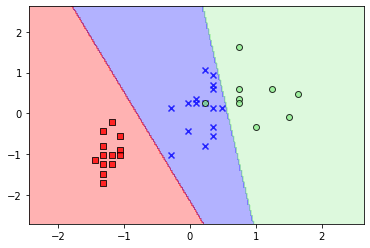

In [72]:

# features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
features = ['PetalWidthCm', 'SepalLengthCm']
X = data[features].values
y = data.Species.values

y = le.fit_transform(y)

# Split data into training and validation data, for both features and target.
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=0)

# apply feature scaling
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
val_X = sc.transform(val_X)

# Define model
model = LogisticRegression(random_state=1)

# Fit model (capture patterns in the data)
model.fit(train_X, train_y)

# get predicted purchased on validation data
val_predictions = model.predict(val_X)

# print mean_absolute_error
val_mae = mean_absolute_error(val_y, val_predictions)
print(f'mean_absolute_error = {val_mae}')

ptools.plot_decision_regions(val_X, val_y, model)

The `mean absolute error` is really good for the validation data.